## P.S-> Relnship b/w strength and other attributes

## D.V is numerical->Regression

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
    

In [121]:

df=pd.read_csv("concrete.csv")

In [122]:
df.shape

(1030, 9)

In [123]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [124]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [125]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [126]:
df.skew(numeric_only=True)

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

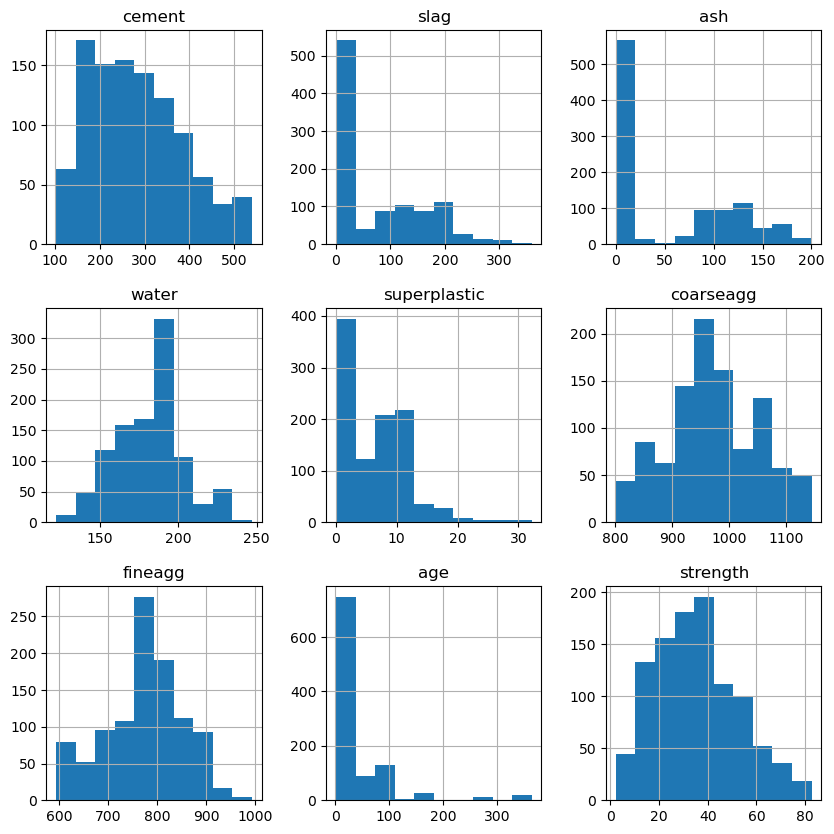

In [127]:
df.hist(figsize=(10,10))
plt.show()

In [128]:
df.sample(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
645,255.0,0.0,0.0,192.0,0.0,889.8,945.0,28,18.75
762,387.0,20.0,94.0,157.0,14.3,938.0,845.0,3,22.75
765,146.5,114.6,89.3,201.9,8.8,860.0,829.5,28,19.99
100,149.5,236.0,0.0,175.8,12.6,846.8,892.7,28,32.96
966,397.0,0.0,0.0,186.0,0.0,1040.0,734.0,28,36.94
40,194.7,0.0,100.5,170.2,7.5,998.0,901.8,14,24.28
530,237.5,237.5,0.0,228.0,0.0,932.0,594.0,90,33.12
574,446.0,24.0,79.0,162.0,11.6,967.0,712.0,56,55.25
788,516.0,0.0,0.0,162.0,8.3,801.0,802.0,28,41.37
703,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,3,14.99


In [129]:
##sns.pairplot(df)

In [130]:
df.corr(numeric_only=True)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<Axes: xlabel='age'>

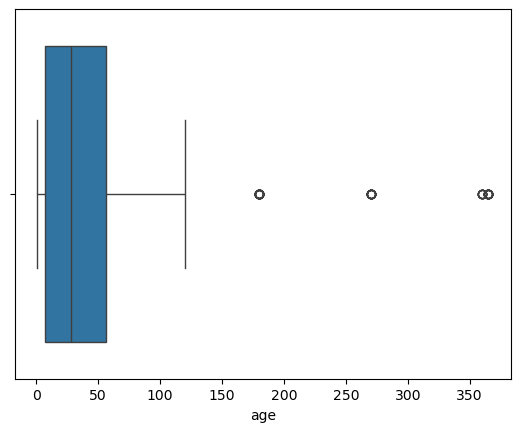

In [131]:
sns.boxplot(x="age",data=df)

In [132]:
## Data Preparation->Nil

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [134]:
y=df[["strength"]]
X=df.drop(["strength"],axis=1)

In [135]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [136]:
model_lr=LinearRegression()

In [137]:
model_lr.fit(X_train,y_train)

LinearRegression()

In [138]:
model_lr.score(X_train,y_train)

0.603148754063023

In [139]:
model_lr.score(X_test,y_test)

0.6339136715208276

In [140]:
from sklearn.neighbors import KNeighborsRegressor

In [163]:
model_knn=KNeighborsRegressor(n_neighbors=7)

In [164]:
model_knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [165]:
model_knn.score(X_train,y_train)

0.7511623220040599

In [166]:
model_knn.score(X_test,y_test)

0.7038625793664957

In [145]:
from sklearn.tree import DecisionTreeRegressor

In [191]:
model_dtr=DecisionTreeRegressor(max_depth=8,min_samples_leaf=15)

In [192]:
model_dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=15)

In [193]:
model_dtr.score(X_train,y_train)

0.829249101164491

In [194]:
model_dtr.score(X_test,y_test)

0.8116582219899489